<a href="https://colab.research.google.com/github/Nguyenhaoanhh/Anh-Hao/blob/main/Cifar100_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

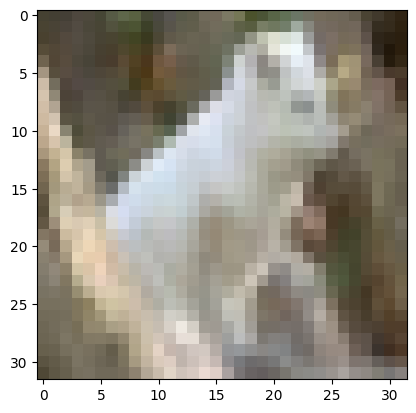

In [1]:
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from  keras.layers import Dense
from keras.utils import to_categorical

(x_train,y_train),(x_test,y_test) = cifar100.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

digist = x_train[15291]
plt.imshow(digist)
plt.show

In [2]:
model =  Sequential()
model.add(Dense(512,activation = 'relu',input_shape = [32*32*3]))
model.add(Dense(1024,activation = 'relu',input_shape = [32*32*3]))
model.add(Dense(100,activation='softmax'))
model.summary()

x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

model = load_model('/content/cifar100.h5')
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['Accuracy'])
model.fit(x_train,y_train,epochs = 1,batch_size = 128)
model.save('cifar100.h5')
test_loss,test_agg = model.evaluate(x_test,y_test)
print('Score: ',test_loss)
print('Score: ',test_agg)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 100)               102500    
                                                                 
Total params: 2,201,188
Trainable params: 2,201,188
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 3s 10ms/step - loss: 3.8611 - Accuracy: 0.1080
Score:  3.861116409301758
Score:  0.1080000028014183


In [3]:
from keras.utils.image_utils import load_img
import numpy as np
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

In [44]:
#Load Model And Train
model = load_model('/content/cifar100.h5')
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['Accuracy'])
model.fit(x_train,y_train,epochs = 20,batch_size = 128)
model.save('cifar100.h5')

Epoch 1/20
391/391 [==============================] - 21s 52ms/step - loss: 1.2551 - Accuracy: 0.6643
Epoch 2/20
391/391 [==============================] - 19s 48ms/step - loss: 1.1993 - Accuracy: 0.6772
Epoch 3/20
391/391 [==============================] - 21s 53ms/step - loss: 1.1843 - Accuracy: 0.6823
Epoch 4/20
391/391 [==============================] - 19s 47ms/step - loss: 1.1699 - Accuracy: 0.6865
Epoch 5/20
391/391 [==============================] - 23s 58ms/step - loss: 1.1550 - Accuracy: 0.6915
Epoch 6/20
391/391 [==============================] - 19s 48ms/step - loss: 1.1309 - Accuracy: 0.6944
Epoch 7/20
391/391 [==============================] - 20s 51ms/step - loss: 1.1169 - Accuracy: 0.7018
Epoch 8/20
391/391 [==============================] - 19s 49ms/step - loss: 1.1150 - Accuracy: 0.7010
Epoch 9/20
391/391 [==============================] - 21s 53ms/step - loss: 1.1027 - Accuracy: 0.7025
Epoch 10/20
391/391 [==============================] - 19s 49ms/step - loss: 1.088

1/1 [==============================] - 0s 71ms/step
Output:  32 , chair


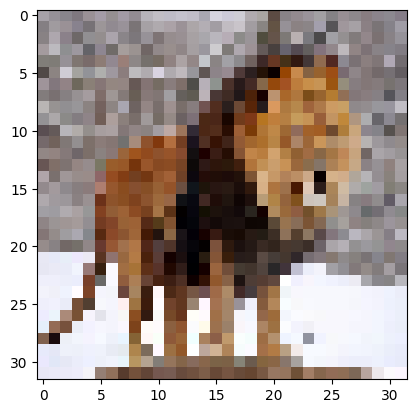

In [45]:
# Test Model
model100=load_model('/content/cifar100.h5')

img = load_img('/content/lion.jpg',target_size=(32,32)) 

plt.imshow(img)
plt.show

img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
c = ['beaver','dolphin', 'otter', 'seal', 'whale','aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
    'orchids', 'poppies', 'roses', 'sunflowers', 'tulips','bottles', 'bowls', 'cans', 'cups', 'plates',
     'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers','clock', 'computer keyboard', 'lamp', 'telephone', 'television',
     'bed', 'chair','couch', 'table', 'wardrobe','bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
     'bear', 'leopard', 'lion', 'tiger', 'wolf','bridge', 'castle', 'house', 'road', 'skyscraper',
     'cloud', 'forest', 'mountain', 'plain', 'sea','camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
     'fox', 'porcupine', 'possum', 'raccoon', 'skunk','crab', 'lobster', 'snail', 'spider', 'worm',
     'baby', 'boy', 'girl', 'man', 'woman','crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
     'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel','maple', 'oak', 'palm', 'pine', 'willow',
      'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train','lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']
kq = np.argmax(model100.predict(img))
#print(kq,type(kq))
print('Output: ',kq,',',c[kq-1])